In [ ]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
image = cv2.imread("15.jpg")  # load image

hsv_img = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)  # BGR to HSV conversion
hsv_img = cv2.resize(hsv_img, (250, 250))

img_s = hsv_img[:, :, 1]  # Extracting Saturation channel on which we will work

img_s_blur = cv2.GaussianBlur(img_s, (7, 7), 0)  # smoothing before applying  threshold

img_s_binary = cv2.threshold(img_s_blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]  # Thresholding to generate binary image (ROI detection)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
img_s_binary = cv2.morphologyEx(img_s_binary, cv2.MORPH_OPEN, kernel, iterations=3)  # reduce some noise

img_croped = cv2.bitwise_and(img_s, img_s_binary) * 2  # ROI only image extraction & contrast enhancement, you can crop this region 

abs_grad_x = cv2.convertScaleAbs(cv2.Sobel(img_croped, cv2.CV_64F, 1, 0, ksize=3))
abs_grad_y = cv2.convertScaleAbs(cv2.Sobel(img_croped, cv2.CV_64F, 0, 1, ksize=3))
grad = cv2.addWeighted(abs_grad_x, .5, abs_grad_y, .5, 0)  # Gradient calculation
grad = cv2.medianBlur(grad, 13)

edges = cv2.threshold(grad, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

cnts = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)  # Contours Detection
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
cnt = None
max_area = 0
for c in cnts:
    area = cv2.contourArea(c)
    if area > max_area:  # Filtering contour
        max_area = area
        cnt = c

cv2.drawContours(hsv_img, [cnt], 0, (0, 255, 0), 3)
a=cv2.drawContours(hsv_img, [cnt], 0, (0, 255, 0), 3)
k= cv2.resize(a, dsize=(640, 480), interpolation=cv2.INTER_AREA)

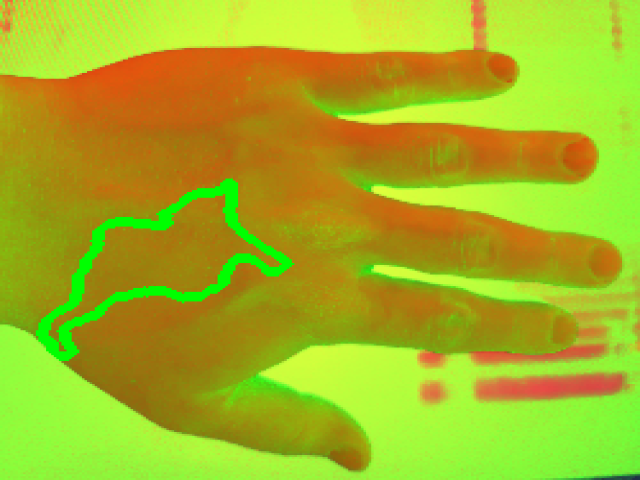

In [ ]:
cv2_imshow(k)

In [ ]:
def remove_green(img):
    empty_img = np.zeros_like(img)
    RED, GREEN, BLUE = (2, 1, 0)
    reds = img[:, :, RED]
    greens = img[:, :, GREEN]
    blues = img[:, :, BLUE]
    # loop over the image, pixel by pixel
    tmpMask = (greens < 35) | (reds > greens) | (blues > greens)
    img[tmpMask == 0] = (0, 0, 0)  # remove background from original picture
    empty_img[tmpMask] = (255, 255, 255)  # mask with finger in white
    return img, empty_img

# main function
# load and process 
image = cv2.imread("15.jpg", 1)  # load
image = cv2.resize(image, None, fx=0.3, fy=0.3)  # resize
image = cv2.GaussianBlur(image, (3, 3), 0)
no_green_image, mask_finger = remove_green(image)  # remove green
gray = cv2.cvtColor(no_green_image, cv2.COLOR_BGR2GRAY)  # gray scalEd
gray_mask_finger = cv2.cvtColor(mask_finger, cv2.COLOR_BGR2GRAY)

# refine edges
kernel = np.ones((5, 5), np.uint8)
gray_mask_finger = cv2.morphologyEx(gray_mask_finger, cv2.MORPH_GRADIENT, kernel)

detect_nail(gray_mask_finger)
# here I struggle

NameError: ignored

In [ ]:
def remove_green(img):
    empty_img = np.zeros_like(img)
    RED, GREEN, BLUE = (2, 1, 0)
    reds = img[:, :, RED]
    greens = img[:, :, GREEN]
    blues = img[:, :, BLUE]
    # loop over the image, pixel by pixel
    tmpMask = (greens < 35) | (reds > greens) | (blues > greens)
    img[tmpMask == 0] = (0, 0, 0)  # remove background from original picture
    empty_img[tmpMask] = (255, 255, 255)  # mask with finger in white
    return img, empty_img

In [ ]:
remove_green(image)[0]

array([[[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       ...,

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [27, 31, 25],
        [28, 32, 26],
        [27, 32, 26]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [27, 31, 25],
        [27, 31, 25],
        [27, 32, 26]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [27, 31, 25],
        [28, 32, 26],
        [28, 32, 26]]], dtype=uint8)

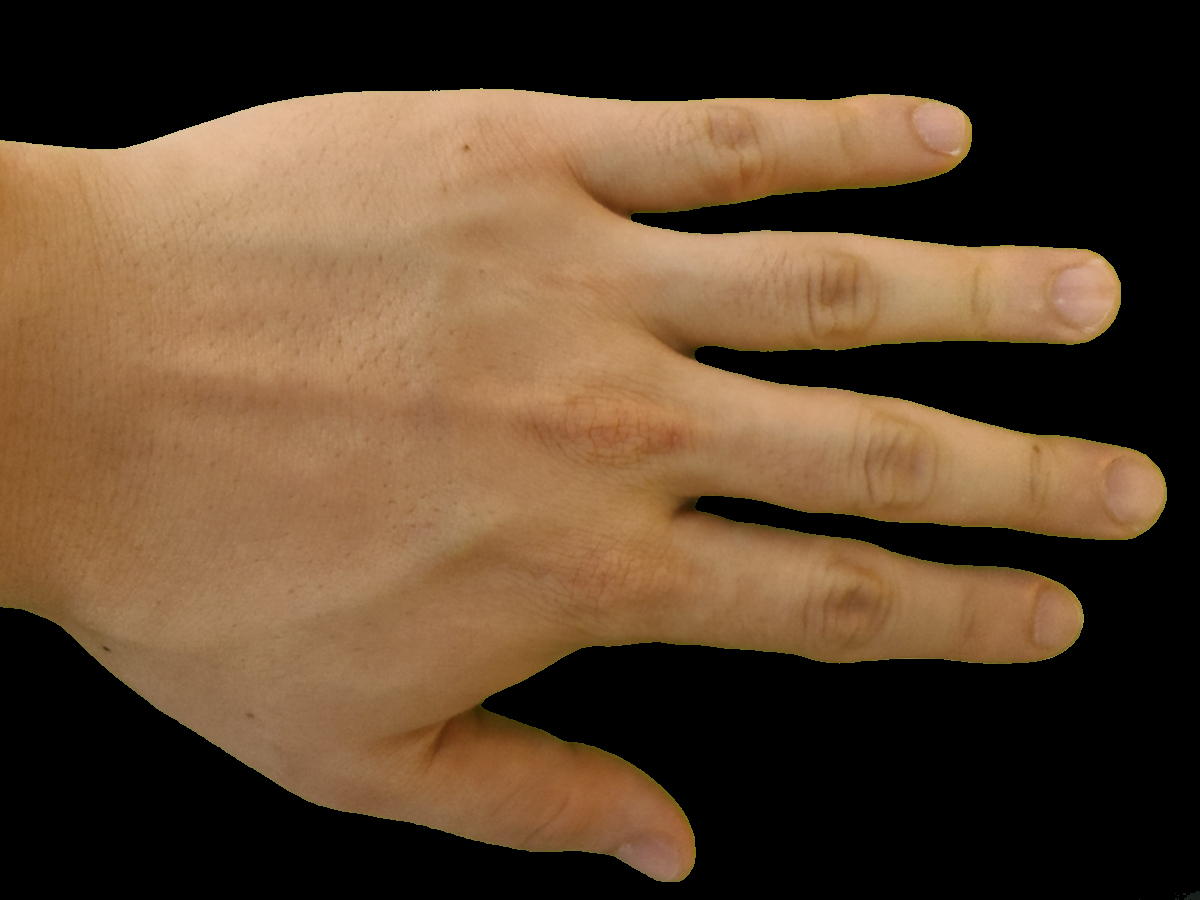

In [ ]:
cv2_imshow(remove_green(image)[0])

In [ ]:
image = cv2.imread("66.png")  # load image

hsv_img = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)  # BGR to HSV conversion
hsv_img = cv2.resize(hsv_img, (250, 250))

img_s = hsv_img[:, :, 1]  # Extracting Saturation channel on which we will work

img_s_blur = cv2.GaussianBlur(img_s, (7, 7), 0)  # smoothing before applying  threshold

img_s_binary = cv2.threshold(img_s_blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]  # Thresholding to generate binary image (ROI detection)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
img_s_binary = cv2.morphologyEx(img_s_binary, cv2.MORPH_OPEN, kernel, iterations=3)  # reduce some noise

img_croped = cv2.bitwise_and(img_s, img_s_binary) * 2  # ROI only image extraction & contrast enhancement, you can crop this region 

abs_grad_x = cv2.convertScaleAbs(cv2.Sobel(img_croped, cv2.CV_64F, 1, 0, ksize=3))
abs_grad_y = cv2.convertScaleAbs(cv2.Sobel(img_croped, cv2.CV_64F, 0, 1, ksize=3))
grad = cv2.addWeighted(abs_grad_x, .5, abs_grad_y, .5, 0)  # Gradient calculation
grad = cv2.medianBlur(grad, 13)

edges = cv2.threshold(grad, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

cnts = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)  # Contours Detection
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
cnt = None
max_area = 0
for c in cnts:
    area = cv2.contourArea(c)
    if area > max_area:  # Filtering contour
        max_area = area
        cnt = c

cv2.drawContours(hsv_img, [cnt], 0, (0, 255, 0), 3)
a=cv2.drawContours(hsv_img, [cnt], 0, (0, 255, 0), 3)
k= cv2.resize(a, dsize=(640, 480), interpolation=cv2.INTER_AREA)

error: ignored

In [ ]:
image = cv2.imread("33.jpg")  # load image

hsv_img = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)  # BGR to HSV conversion
hsv_img = cv2.resize(hsv_img, (250, 250))

img_s = hsv_img[:, :, 1]  # Extracting Saturation channel on which we will work

img_s_blur = cv2.GaussianBlur(img_s, (7, 7), 0)  # smoothing before applying  threshold

img_s_binary = cv2.threshold(img_s_blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]  # Thresholding to generate binary image (ROI detection)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
img_s_binary = cv2.morphologyEx(img_s_binary, cv2.MORPH_OPEN, kernel, iterations=3)  # reduce some noise

img_croped = cv2.bitwise_and(img_s, img_s_binary) * 2  # ROI only image extraction & contrast enhancement, you can crop this region 

abs_grad_x = cv2.convertScaleAbs(cv2.Sobel(img_croped, cv2.CV_64F, 1, 0, ksize=3))
abs_grad_y = cv2.convertScaleAbs(cv2.Sobel(img_croped, cv2.CV_64F, 0, 1, ksize=3))
grad = cv2.addWeighted(abs_grad_x, .5, abs_grad_y, .5, 0)  # Gradient calculation
grad = cv2.medianBlur(grad, 13)

edges = cv2.threshold(grad, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

cnts = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)  # Contours Detection
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
cnt = None
max_area = 0
for c in cnts:
    area = cv2.contourArea(c)
    if area > max_area:  # Filtering contour
        max_area = area
        cnt = c

cv2.drawContours(hsv_img, [cnt], 0, (0, 255, 0), 3)
a=cv2.drawContours(hsv_img, [cnt], 0, (0, 255, 0), 3)
k= cv2.resize(a, dsize=(640, 480), interpolation=cv2.INTER_AREA)

error: ignored

In [ ]:
k= cv2.resize(a, dsize=(640, 480), interpolation=cv2.INTER_AREA)

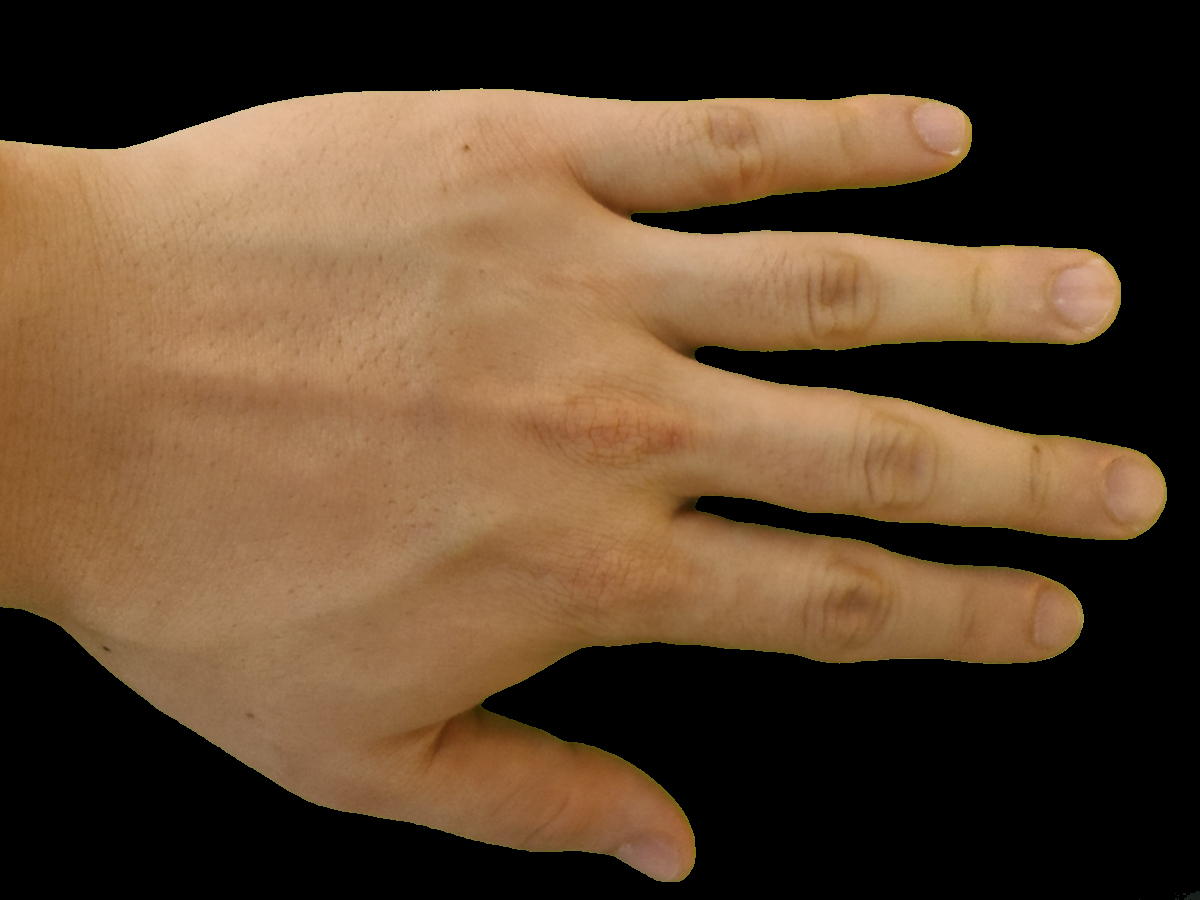

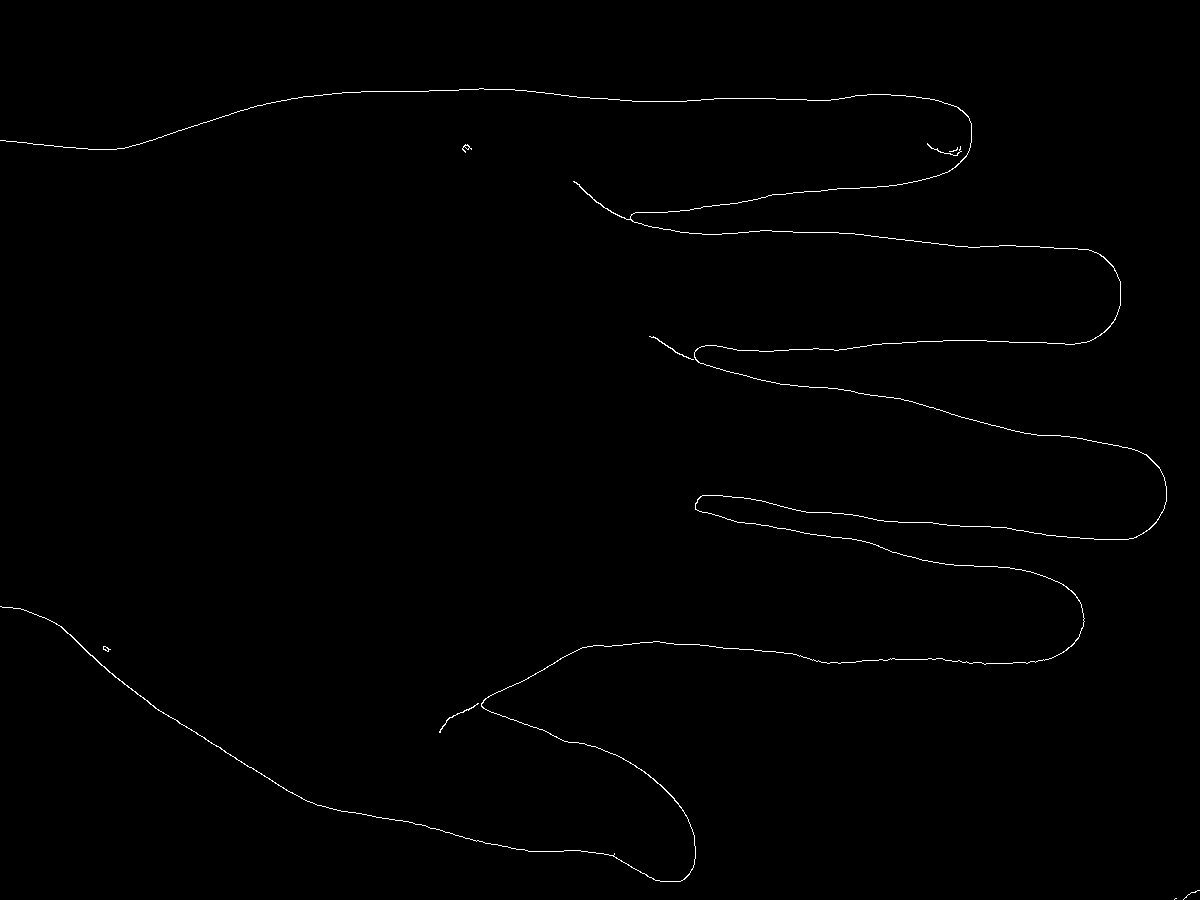

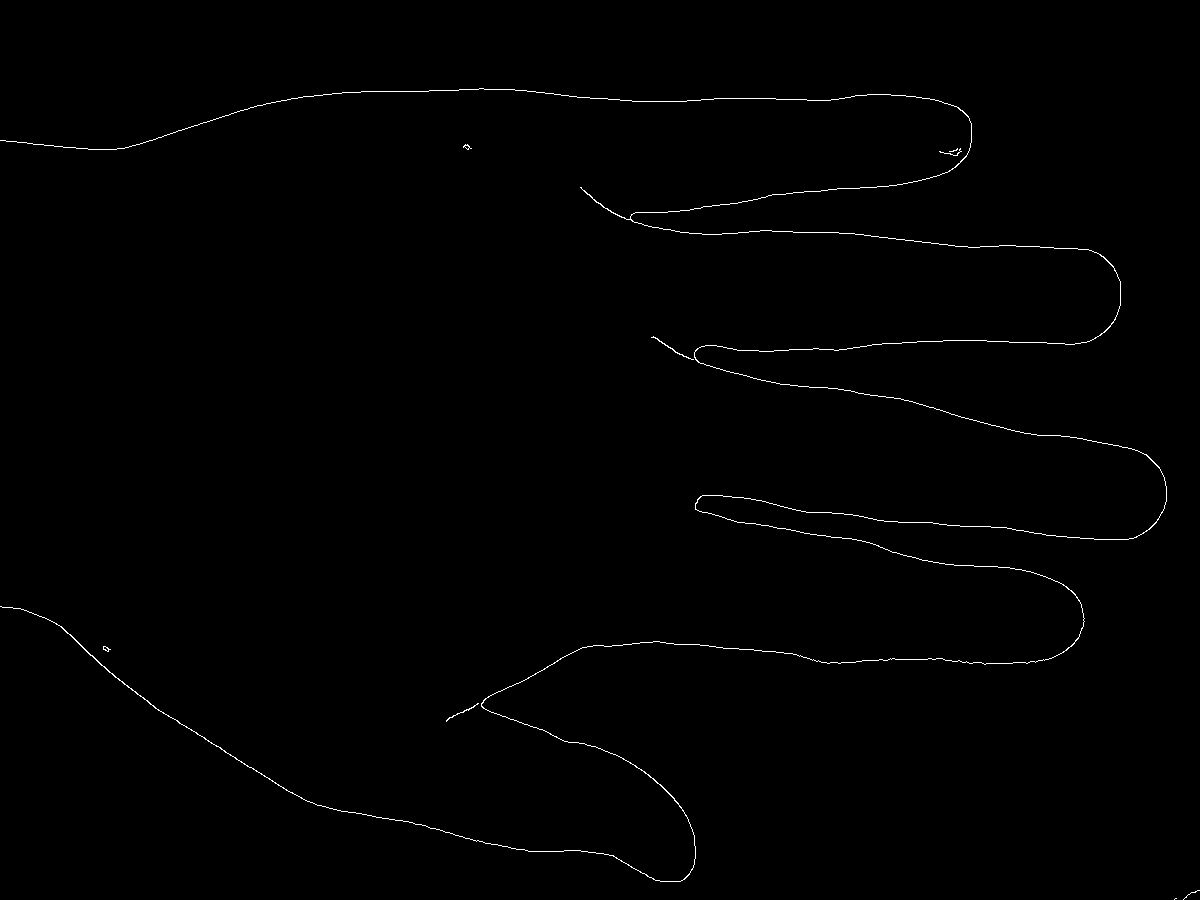

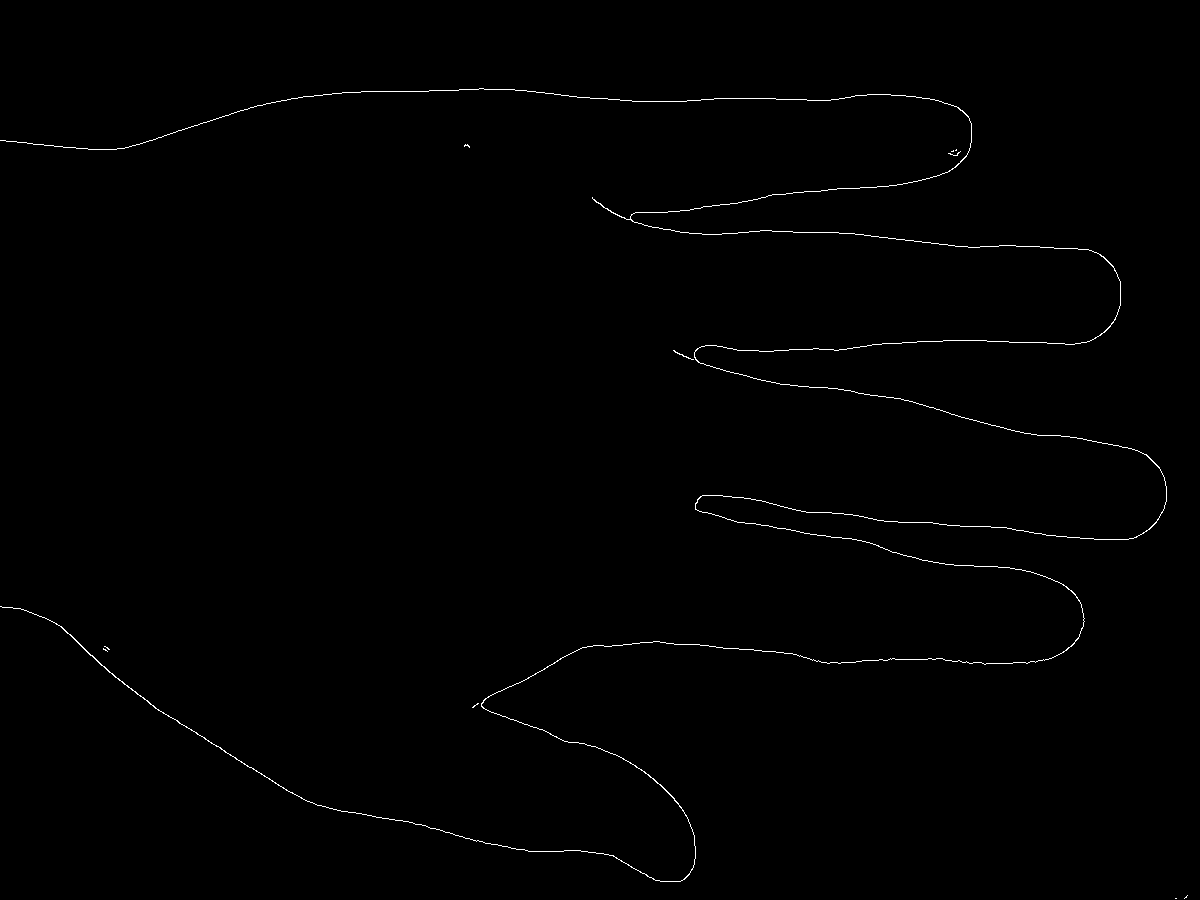

In [ ]:
#캐니 엣지
def canny():
    img=cv2.imread('66.png',cv2.IMREAD_COLOR)
    edge1=cv2.Canny(img,50,200)
    edge2=cv2.Canny(img,100,200)
    edge3=cv2.Canny(img,170,200)
    
    cv2_imshow(img)
    cv2_imshow(edge1)
    cv2_imshow(edge2)
    cv2_imshow(edge3)
    
    cv2.waitKey(0)
    cv2.destroyAllWindows()

canny()

In [ ]:
a=cv2.imread('66.png')

In [ ]:
a

array([[[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       ...,

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [27, 31, 25],
        [28, 32, 26],
        [27, 32, 26]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [27, 31, 25],
        [27, 31, 25],
        [27, 32, 26]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [27, 31, 25],
        [28, 32, 26],
        [28, 32, 26]]], dtype=uint8)